In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [4]:
def vis_classification(dataframe, no_features, first_feature, last_feature, line, location_line, subset, label_line, name_sensor):
    fig, axes = plt.subplots(subset, 1, figsize=(10,6), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe["up time"]
    for i in range(first_feature, last_feature):
        # Values for drawing lower and upper bound
        target = dataframe.iloc[:,i].values
        mu = dataframe.iloc[:,i+no_features].values
        sigma = dataframe.iloc[:,i+2*no_features].values
        lower_bound = mu - 2*sigma
        upper_bound = mu + 2* sigma
        
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+4*no_features+1].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["green"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["green"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["green","red"]

        # Prediction of mu
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+ no_features], 
                     ax=ax[i-first_feature],
                     color="black",
                     label="$\hat{y}$",
                     linewidth=.6)
        
        # Confidence bound (+- 2 sigma)
        ax[i-first_feature].fill_between(t, lower_bound, upper_bound, color="grey", alpha=0.5, label="Prediction Interval \n $(2\hat{\sigma})$")
        
        # Target values (actual sensor values)
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax[i-first_feature], 
                        hue=columns[i+4*no_features+1],
                        palette=palette,
                        s=6,
                        linewidth=.1)
        
        # Line to show known failures
        if line:
            for r, location in enumerate(location_line):
                if r == 0:
                    ax[i-first_feature].axvline(location, 0,2, color="b", linestyle ="--", linewidth=1.5, label=label_line)
                else:
                    ax[i-first_feature].axvline(location, 0,2, color="b", linestyle ="--", linewidth=1.5)
                
        # Set labels etc. 
        ax[i-first_feature].legend(loc='center left', 
                                   bbox_to_anchor=(1, 0.5),
                                   fancybox=True, 
                                   shadow=True, 
                                   ncol=1,
                                   prop={'size': 8})
        ax[i-first_feature].set_xlabel("time [in s]")
        ax[i-first_feature].set_ylabel(name_sensor[i-first_feature])
        ax[i-first_feature].set_title("Sensor No.{}".format(i))

# Visualisation and Evaluation of Prediction

In [8]:
# Name of Sensors
name_of_sensor = ["IONGAUGEPRESSURE",
                  "ETCHBEAMVOLTAGE",
                  "ETCHBEAMCURRENT",
                  "ETCHSUPPRESSORVOLTAGE",
                  "ETCHSUPPRESSORCURRENT",
                  "FLOWCOOLFLOWRATE",
                  "FLOWCOOLPRESSURE",
                  "ETCHGASCHANNEL1READBACK",
                  "ETCHPBNGASREADBACK",
                  "FIXTURETILTANGLE",
                  "ACTUALROTATIONANGLE",
                  "ACTUALSTEPDURATION"]

## Examples of predictions before failures 

In [10]:
artifical_data = pd.read_csv("../../files/classification/MLE/phm_recipe_67.csv", sep=";")
subset_1 = artifical_data.loc[(artifical_data["up time"]>= 3750966) & (artifical_data["up time"]<= 3818362)]

In [11]:
failures = [3807966.]

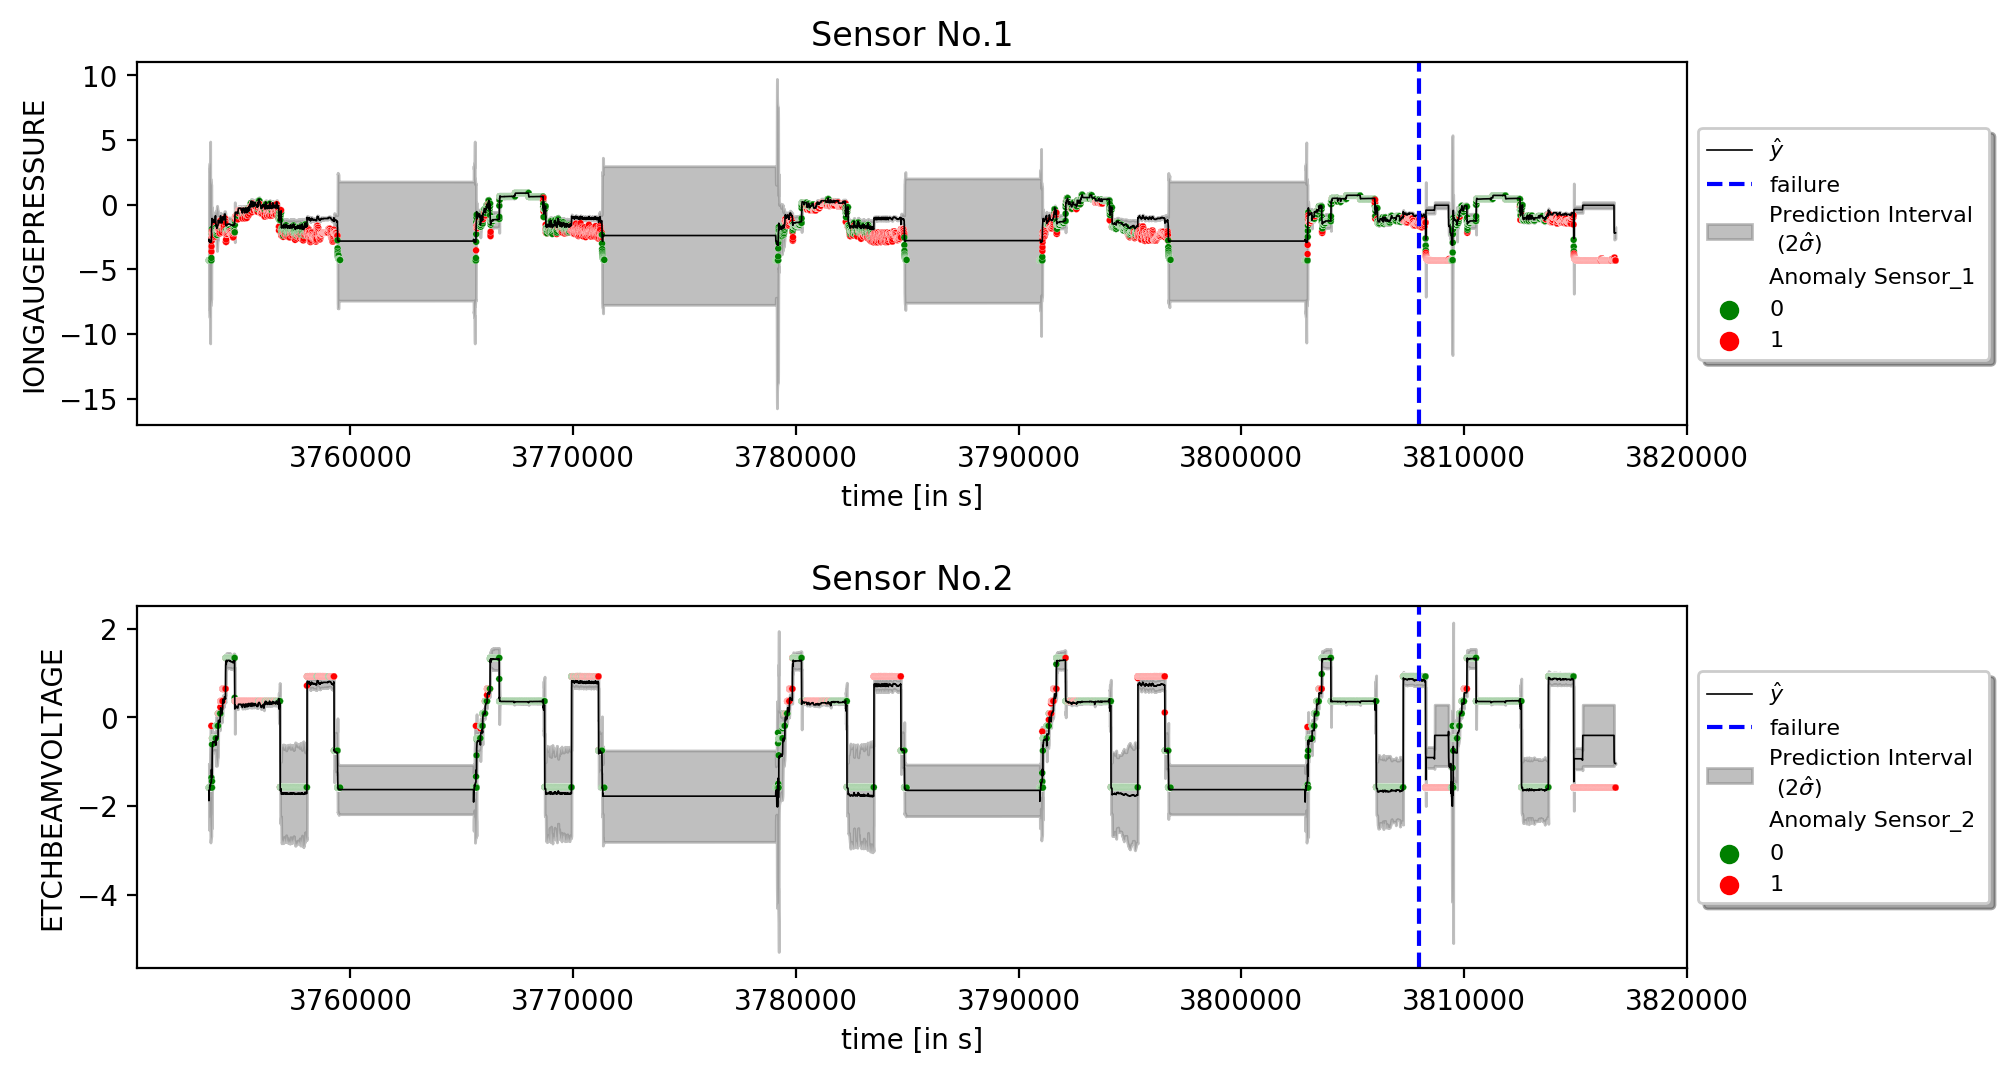

In [12]:
vis_classification(dataframe = subset_1,
                   no_features=12, 
                   first_feature=1, 
                   last_feature=3,
                   line = True,
                   location_line = failures,
                   subset = 2,
                   label_line="failure",
                   name_sensor=name_of_sensor)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_phm_0.png")
plt.show()

In [13]:
artifical_data = pd.read_csv("../../files/classification/MLE/phm_recipe_67.csv", sep=";")
subset_2 = artifical_data.loc[(artifical_data["up time"]>= 3853686) & (artifical_data["up time"]<= 3872094)]

In [14]:
failures = [3856686., 3860122., 3865202., 3867646., 3868170.,3870094.]

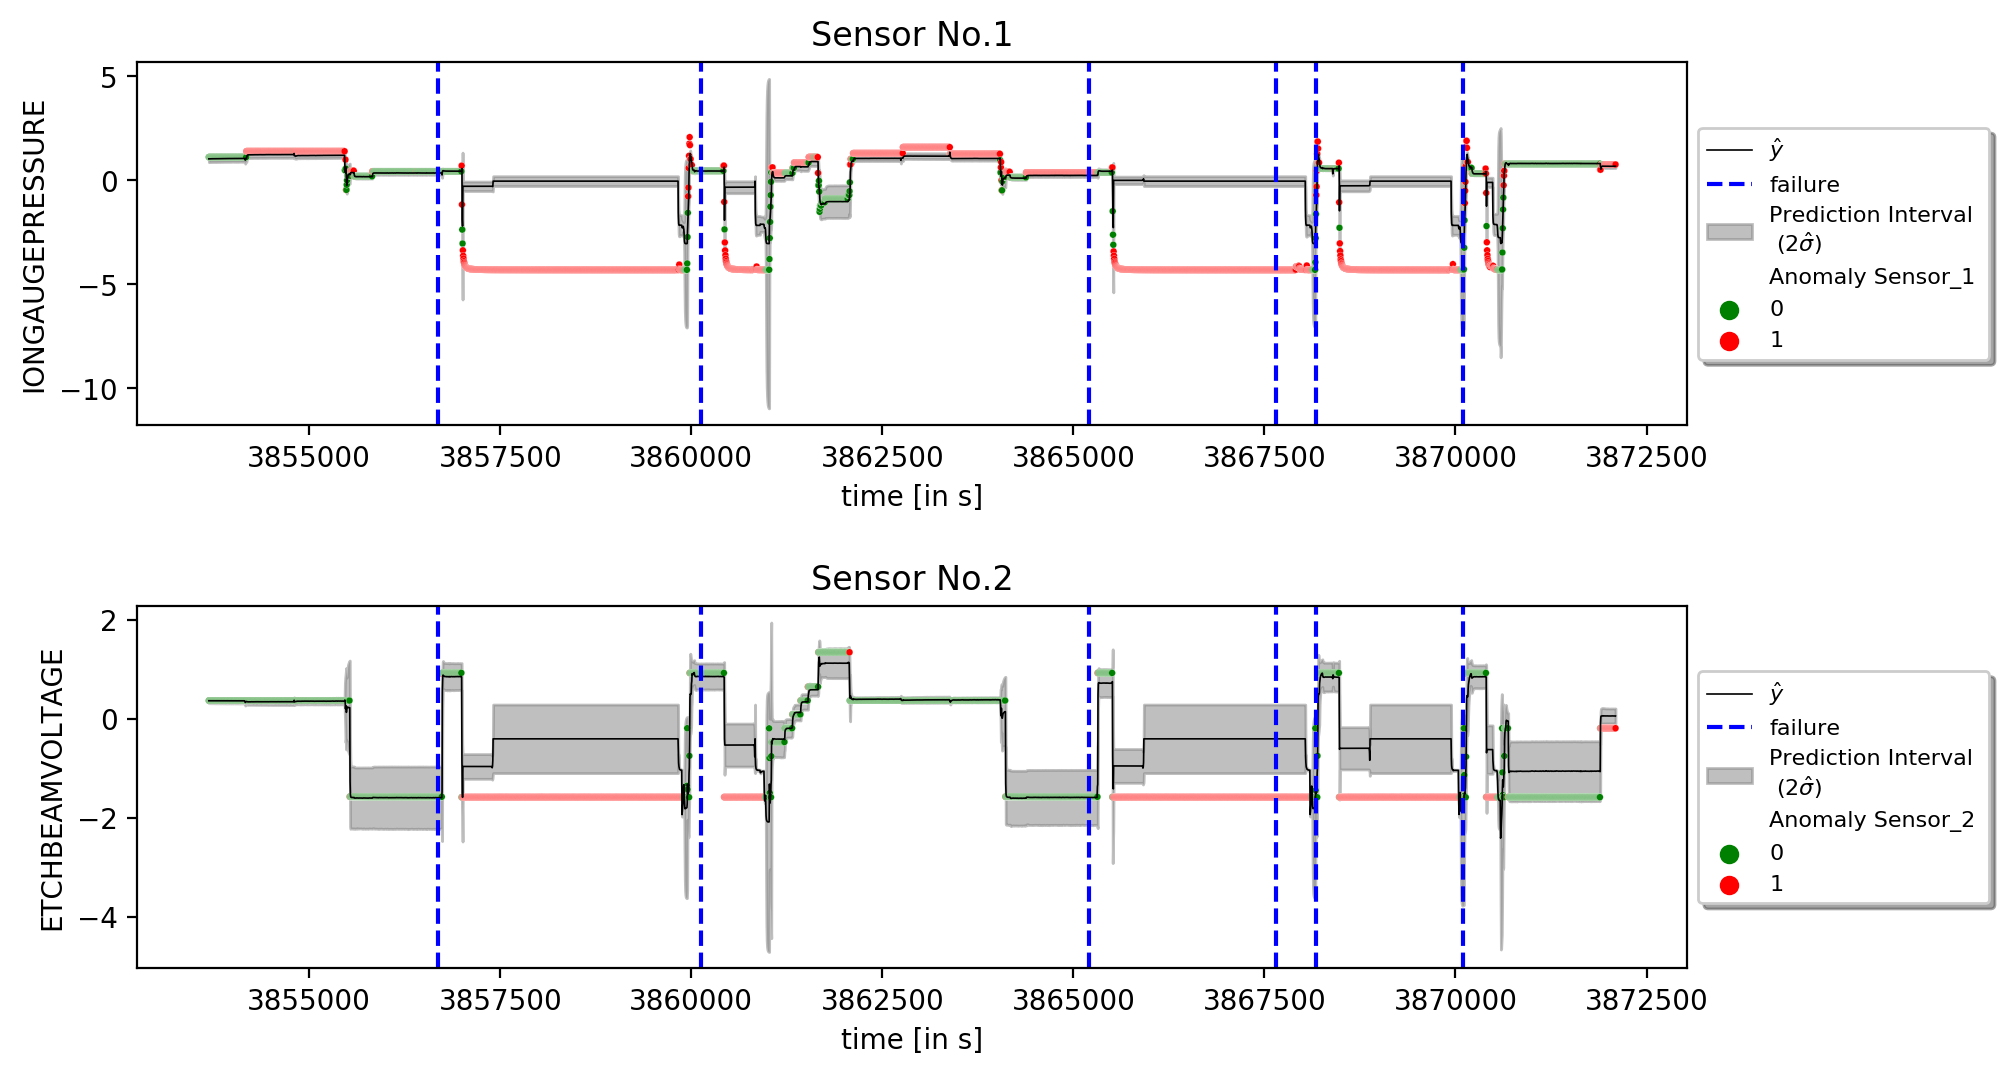

In [15]:
vis_classification(dataframe = subset_2,
                   no_features=12, 
                   first_feature=1, 
                   last_feature=3,
                   line = True,
                   location_line = failures,
                   subset = 2,
                   label_line="failure",
                   name_sensor=name_of_sensor)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_phm_0.png")
plt.show()